# Visualize TwinGAN: Real vs Generated Sequences

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import os

# Load data
X_real = np.load("../data/X_fail.npy")
X_fake = np.load("../gan_model/saved/generated_samples.npy")
print("Real:", X_real.shape, "Generated:", X_fake.shape)


Real: (7075, 50, 5) Generated: (5, 50, 5)


## Compare a Sample Sequence (Real vs Synthetic)

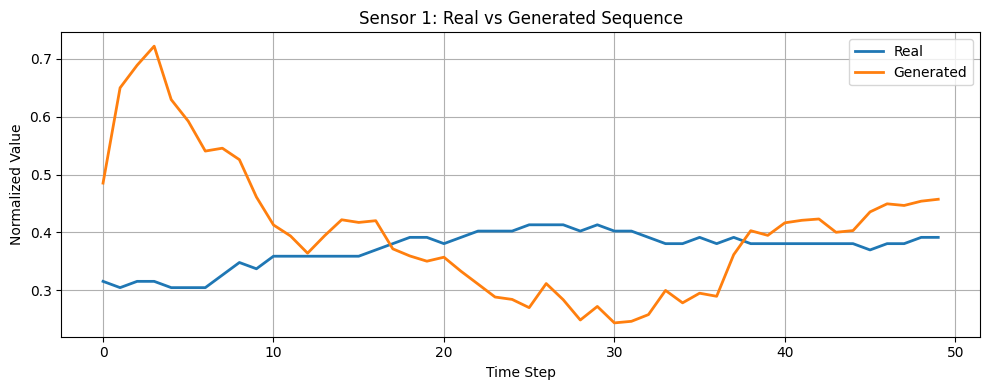

In [2]:
# Plot first sensor over 50 timesteps for one sequence
plt.figure(figsize=(10, 4))
plt.plot(X_real[0][:, 0], label="Real", linewidth=2)
plt.plot(X_fake[0][:, 0], label="Generated", linewidth=2)
plt.title("Sensor 1: Real vs Generated Sequence")
plt.xlabel("Time Step")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../plots/sequence_comparison.png")
plt.show()

## PCA / t-SNE Embedding of Real and Generated Sequences

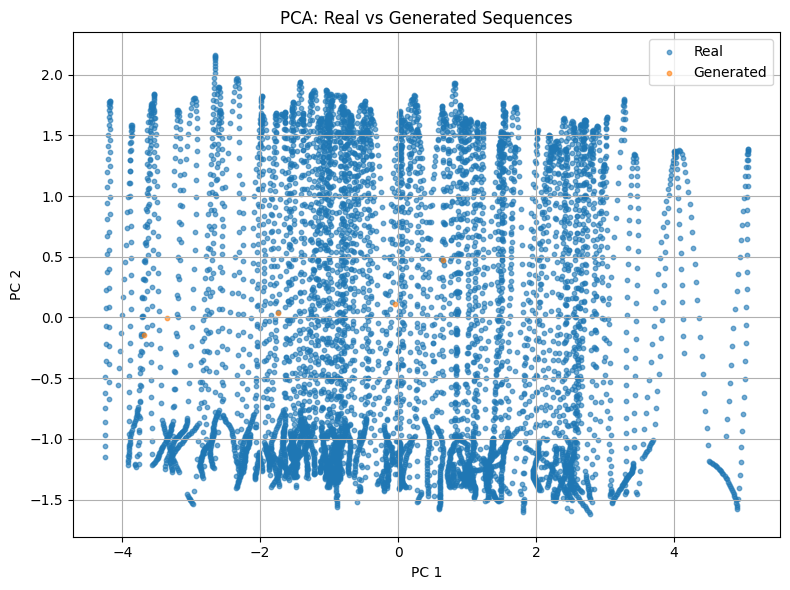

In [3]:
# Flatten sequences
X_real_flat = X_real.reshape(X_real.shape[0], -1)
X_fake_flat = X_fake.reshape(X_fake.shape[0], -1)

# Combine and label
X_combined = np.vstack([X_real_flat, X_fake_flat])
y_labels = np.array([0]*len(X_real_flat) + [1]*len(X_fake_flat))

# PCA or t-SNE
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y_labels==0, 0], X_pca[y_labels==0, 1], alpha=0.6, label='Real', s=10)
plt.scatter(X_pca[y_labels==1, 0], X_pca[y_labels==1, 1], alpha=0.6, label='Generated', s=10)
plt.title("PCA: Real vs Generated Sequences")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../plots/pca_comparison.png")
plt.show()

## Plot All Sensor Channels for One Sequence: Real vs Generated

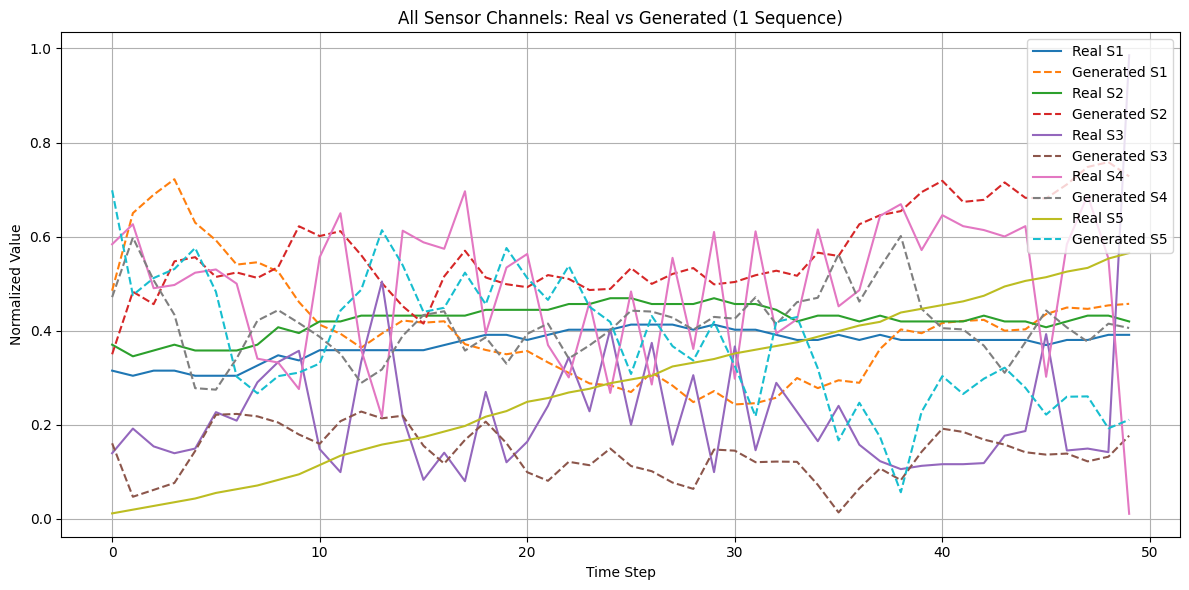

In [ ]:
# 4. Plot All Sensor Channels for One Sequence: Real vs Generated
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.plot(X_real[0][:, i], label=f"Real S{i+1}", linestyle='-')
    plt.plot(X_fake[0][:, i], label=f"Generated S{i+1}", linestyle='--')
plt.title("All Sensor Channels: Real vs Generated (1 Sequence)")
plt.xlabel("Time Step")
plt.ylabel("Normalized Value")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.savefig("../plots/all_sensors_comparison.png")
plt.show()


## Overlay Distribution of Mean Sensor Values (Real vs Generated)

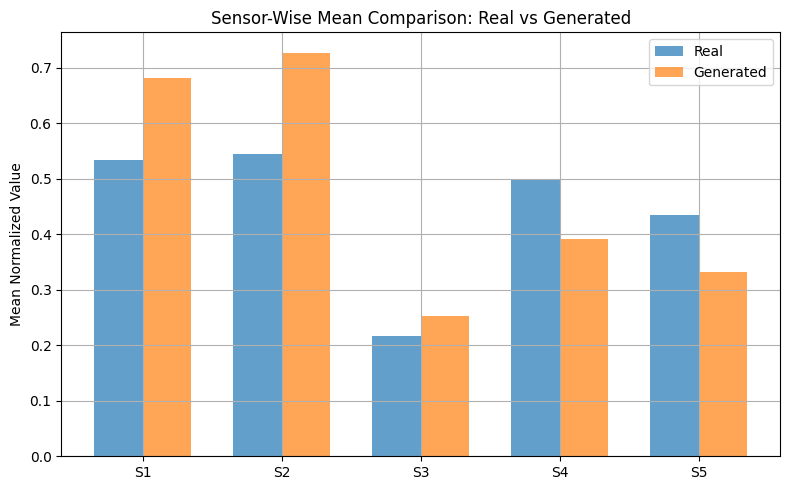

In [ ]:
#  5. Overlay Distribution of Mean Sensor Values (Real vs Generated)
real_means = X_real.mean(axis=1).mean(axis=0)  # mean per sensor
fake_means = X_fake.mean(axis=1).mean(axis=0)

x = range(1, 6)
bar_width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x, real_means, width=bar_width, label='Real', alpha=0.7)
plt.bar([i + bar_width for i in x], fake_means, width=bar_width, label='Generated', alpha=0.7)
plt.xticks([i + bar_width / 2 for i in x], [f'S{i}' for i in x])
plt.ylabel('Mean Normalized Value')
plt.title('Sensor-Wise Mean Comparison: Real vs Generated')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../plots/sensor_means_barplot.png")
plt.show()
